# Fall 2022 Enrollment Prediction

Authors:

Isaac Agyei

William Ofori-Atta

Richmond Owusu

The goal of this project is to forecast the number of students who will enroll in math classes at Ohio University. A five\-year enrollment record was employed as the data source.

The first goal was to use the Python pandas module to clean up the data set. Following that, various models for predicting course enrollment were used. The initial prediction model was a null prediction, which predicted the exact same enrollment number as the enrollment number immediately before it. The average of the enrollment number for the previous two years and the average for all five available years were also utilized as prediction models in the second prediction model, which was a linear prediction. The final prediction model was developed using the confirmation ratio for incoming students over the previous two years. The findings reached using these prediction models were to determine the percentage of math course enrollment to overall university enrollment and freshman math course enrollment to total freshman enrollment. In addition, a graph depicting the pattern of prior enrollment figures as well as the anticipated enrolment number for the coming year was shown.

However, as of April 2020, confirmation for Fall 2020 was 2725 which was less than the actual enrollment for that particular year, 3126.  Also, confirmation as of May 2020 was greater than the actual enrollment for Fall 2020. This analysis holds for Fall 2021. Based on this analysis, we could predict that enrollment for Fall 2022 should fall within confirmation for April 2022\(3579\) and May 2022\(4662\). 

Looking at our aforementioned prediction model, you can see that our confirmation model gives us a predicted value of 4554 which falls within confirmation as of April \(3579\) and May\(4662\).

Based on this model, we are able to predict the enrollment for each  Math course in 2022:

MATH1060 \- 193

MATH1101 \- 150

MATH1200 \- 913

MATH1300 \- 551

MATH1350 \- 465

MATH1500 \- 71

MATH2301 \- 367

MATH2500 \- 83

MATHD00 - 179



In [2]:
# import the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
HistFall = pd.read_excel('Fall 5 Year Historic Course Enrollment.xlsx', skiprows = 3, index_col = 3, header = [1,2])
HistFall.head((10))


Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0  \
Cat # College Description        Dept/School            Subject   
1060      Arts & Sciences               MATH               MATH   
1090                  NaN                NaN                NaN   
1101                  NaN                NaN                NaN   
1102                  NaN                NaN                NaN   
1200                  NaN                NaN                NaN   
1200L                 NaN                NaN                NaN   
1300                  NaN                NaN                NaN   
1350                  NaN                NaN                NaN   
1500                  NaN                NaN                NaN   
2110                  NaN                NaN                NaN   

      Unnamed: 4_level_0 Unnamed: 5_level_0            Unnamed: 6_level_0  \
Cat #              Tiers             BRICKS                         Class   
1060                  1M                FQR        Quantitative Reasoning   
1090                  1M                NaN          Consumer Mathematics   
1101                  1M                FQR   Elementary Topics in Math I   
1102                  1M               ACSW  Elementary Topics in Math II   
1200                  1M                FQR               College Algebra   
1200L                NaN                NaN    College Algebra Essentials   
1300                  1M                FQR                  Pre-Calculus   
1350                 2AS                FQR            Survey of Calculus   
1500                  1M                FQR       Introductory Statistics   
2110                 NaN                NaN                Intro Geometry   

      Fall 17-18          Fall 18-19          Fall 19-20          Fall 20-21  \
Cat #   Enrolled Max Size   Enrolled Max Size   Enrolled Max Size   Enrolled   
1060         NaN      NaN       10.0     40.0       46.0     70.0       52.0   
1090        34.0     45.0       40.0     45.0       37.0     45.0       37.0   
1101       140.0    160.0      141.0    160.0      146.0    160.0      102.0   
1102        27.0     40.0       28.0     40.0       23.0     40.0       36.0   
1200       824.0    990.0      726.0   1005.0      676.0    770.0      544.0   
1200L        NaN      NaN        NaN      NaN        NaN      NaN        NaN   
1300       682.0    743.0      683.0    766.0      469.0    630.0      353.0   
1350       625.0    711.0      531.0    688.0      475.0    575.0      417.0   
1500         NaN      NaN        NaN      NaN        NaN      NaN        NaN   
2110        10.0     40.0       22.0     40.0       24.0     40.0        7.0   

               Fall 21-22           
Cat # Max Size   Enrolled Max Size  
1060      70.0      155.0    160.0  
1090      45.0        NaN      NaN  
1101     135.0      121.0    120.0  
1102      40.0       17.0     28.0  
1200     679.0      735.0    765.0  
1200L      NaN       87.0     90.0  
1300     506.0      443.0    465.0  
1350     565.0      374.0    450.0  
1500       NaN       57.0     90.0  
2110      40.0       17.0     18.0

In [5]:
# Cleaning data for good use
#Fall = HistFall.iloc[4:]
Fall = HistFall.iloc[0:85,6:15:2]
Fall = Fall.rename(index={np.nan:'Math Total'})
Fall = Fall.fillna(0)
Fall.loc['Fresh Total'] = [4045, 3980, 3671, 3126, 3664]
Fall.loc['Uni Total'] = [23323, 22449, 20798, 19138, 18249]

Fall

,Fall 17-18,Fall 18-19,Fall 19-20,Fall 20-21,Fall 21-22
Cat #,Enrolled,Enrolled,Enrolled,Enrolled,Enrolled
1060,0.0,10.0,46.0,52.0,155.0
1090,34.0,40.0,37.0,37.0,0.0
1101,140.0,141.0,146.0,102.0,121.0
1102,27.0,28.0,23.0,36.0,17.0
1200,824.0,726.0,676.0,544.0,735.0
...,...,...,...,...,...
D005,280.0,250.0,291.0,197.0,144.0
D200X,0.0,0.0,0.0,37.0,0.0
Math Total,4163.0,4054.0,3623.0,3015.0,3339.0


      Fall 17-18 Fall 18-19 Fall 19-20 Fall 20-21 Fall 21-22
Cat #   Enrolled   Enrolled   Enrolled   Enrolled   Enrolled
1060         0.0       10.0       46.0       52.0      155.0
1200       824.0      726.0      676.0      544.0      735.0
1300       682.0      683.0      469.0      353.0      443.0


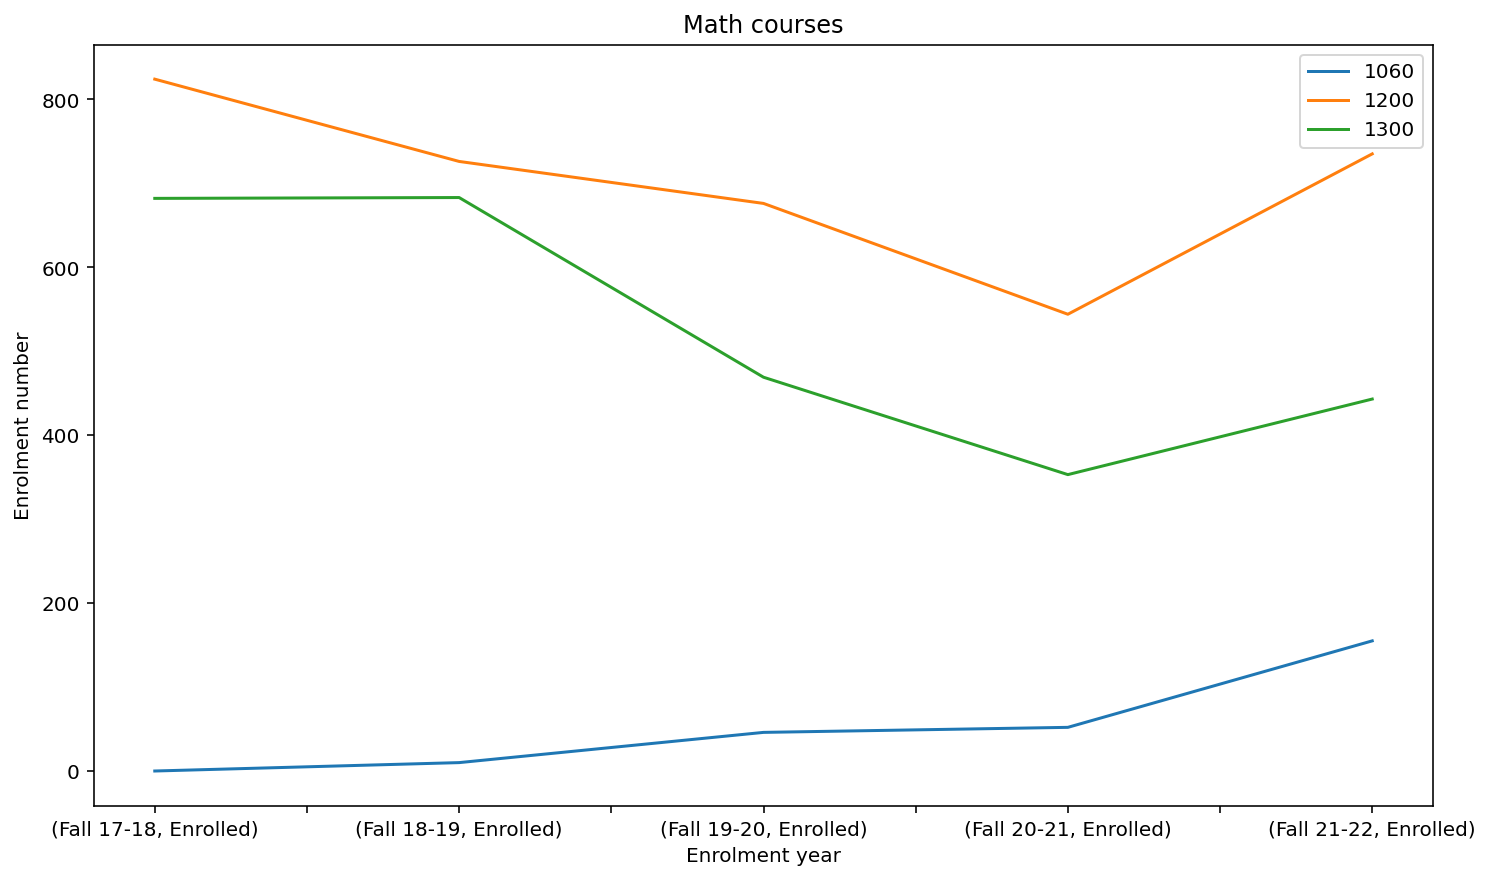

In [6]:
# Plot data trends for selected program

Math_predict = Fall.loc[['1060','1200','1300']]
print(Math_predict)
for i in range(3):
    Math_predict.iloc[i].plot(title='Math courses', legend=True, xlabel='Enrolment year', ylabel='Enrolment number')



# Regression Model

Each enrollment is independent to each other. I need to fit a model for each course that can solve the problem by considering multiple regression. 

In [7]:
# Make a null prediction model

Fall[('Fall 22-23', 'Null prediction')] = Fall[('Fall 21-22', 'Enrolled')]

# Make a linear prediction model
Fall[('Fall 22-23', 'Linear prediction')] = ( Fall[('Fall 21-22', 'Enrolled')] - Fall[('Fall 20-21', 'Enrolled')] ) + Fall[('Fall 21-22', 'Enrolled')]

# Make a moving average prediction model
Fall[('Fall 22-23', 'Average prediction')] = (1/2) * ( Fall[('Fall 21-22', 'Enrolled')] + Fall[('Fall 20-21', 'Enrolled')] )

# Make a confirmation of incoming prediction model
confirm_Fall22 = 4662
confirm_Fall21 = 3751
Fall[('Fall 22-23', 'Confirm Incoming prediction')] = Fall[('Fall 21-22', 'Enrolled')] * (confirm_Fall22 / confirm_Fall21)
# Make a course average
Fall[('Fall 22-23', 'Course Average')] = (1/5) * (Fall[('Fall 17-18', 'Enrolled')] + Fall[('Fall 18-19', 'Enrolled')]+ Fall[('Fall 19-20', 'Enrolled')]+ Fall[('Fall 20-21', 'Enrolled')] + Fall[('Fall 21-22', 'Enrolled')])
Fall



Fall 17-18 Fall 18-19 Fall 19-20 Fall 20-21 Fall 21-22  \
Cat #         Enrolled   Enrolled   Enrolled   Enrolled   Enrolled   
1060               0.0       10.0       46.0       52.0      155.0   
1090              34.0       40.0       37.0       37.0        0.0   
1101             140.0      141.0      146.0      102.0      121.0   
1102              27.0       28.0       23.0       36.0       17.0   
1200             824.0      726.0      676.0      544.0      735.0   
...                ...        ...        ...        ...        ...   
D005             280.0      250.0      291.0      197.0      144.0   
D200X              0.0        0.0        0.0       37.0        0.0   
Math Total      4163.0     4054.0     3623.0     3015.0     3339.0   
Fresh Total     4045.0     3980.0     3671.0     3126.0     3664.0   
Uni Total      23323.0    22449.0    20798.0    19138.0    18249.0   

                 Fall 22-23                                       \
Cat #       Null prediction Linear prediction Average prediction   
1060                  155.0             258.0              103.5   
1090                    0.0             -37.0               18.5   
1101                  121.0             140.0              111.5   
1102                   17.0              -2.0               26.5   
1200                  735.0             926.0              639.5   
...                     ...               ...                ...   
D005                  144.0              91.0              170.5   
D200X                   0.0             -37.0               18.5   
Math Total           3339.0            3663.0             3177.0   
Fresh Total          3664.0            4202.0             3395.0   
Uni Total           18249.0           17360.0            18693.5   

                                                        
Cat #       Confirm Incoming prediction Course Average  
1060                         192.644628           52.6  
1090                           0.000000           29.6  
1101                         150.387097          130.0  
1102                          21.128766           26.2  
1200                         913.508398          701.0  
...                                 ...            ...  
D005                         178.973074          232.4  
D200X                          0.000000            7.4  
Math Total                  4149.938150         3638.8  
Fresh Total                 4553.870435         3697.2  
Uni Total                  22681.108504        20791.4  

[87 rows x 10 columns]

In [8]:
# predict the number of enrollment in mathematics department proportional to the university enrollment.
Fall.loc['Math prop'] = Fall.loc['Math Total'] / Fall.loc['Uni Total']
Fall

Fall 17-18    Fall 18-19    Fall 19-20   Fall 20-21  \
Cat #            Enrolled      Enrolled      Enrolled     Enrolled   
1060             0.000000     10.000000     46.000000     52.00000   
1090            34.000000     40.000000     37.000000     37.00000   
1101           140.000000    141.000000    146.000000    102.00000   
1102            27.000000     28.000000     23.000000     36.00000   
1200           824.000000    726.000000    676.000000    544.00000   
...                   ...           ...           ...          ...   
D200X            0.000000      0.000000      0.000000     37.00000   
Math Total    4163.000000   4054.000000   3623.000000   3015.00000   
Fresh Total   4045.000000   3980.000000   3671.000000   3126.00000   
Uni Total    23323.000000  22449.000000  20798.000000  19138.00000   
Math prop        0.178493      0.180587      0.174199      0.15754   

               Fall 21-22      Fall 22-23                    \
Cat #            Enrolled Null prediction Linear prediction   
1060           155.000000      155.000000        258.000000   
1090             0.000000        0.000000        -37.000000   
1101           121.000000      121.000000        140.000000   
1102            17.000000       17.000000         -2.000000   
1200           735.000000      735.000000        926.000000   
...                   ...             ...               ...   
D200X            0.000000        0.000000        -37.000000   
Math Total    3339.000000     3339.000000       3663.000000   
Fresh Total   3664.000000     3664.000000       4202.000000   
Uni Total    18249.000000    18249.000000      17360.000000   
Math prop        0.182969        0.182969          0.211002   

                                                                           
Cat #       Average prediction Confirm Incoming prediction Course Average  
1060                103.500000                  192.644628      52.600000  
1090                 18.500000                    0.000000      29.600000  
1101                111.500000                  150.387097     130.000000  
1102                 26.500000                   21.128766      26.200000  
1200                639.500000                  913.508398     701.000000  
...                        ...                         ...            ...  
D200X                18.500000                    0.000000       7.400000  
Math Total         3177.000000                 4149.938150    3638.800000  
Fresh Total        3395.000000                 4553.870435    3697.200000  
Uni Total         18693.500000                22681.108504   20791.400000  
Math prop             0.169952                    0.182969       0.175015  

[88 rows x 10 columns]

In [15]:
# Predict proportion of fresh math enrollment to total fresh university enrollment
#Fresh = Fall.iloc[0:9].copy()
Fresh = Fall.loc[['1060', '1101', '1200', '1300', '1350', '1500', '2301', '2500', 'D005']].copy()
Fresh.loc['FMath Total'] = Fresh.sum()
Fresh.loc['Fresh Total'] = Fall.iloc[85].copy()
Fresh.loc['FMath prop'] = Fresh.loc['FMath Total'] / Fresh.loc['Fresh Total']

Fresh




Fall 17-18   Fall 18-19   Fall 19-20   Fall 20-21   Fall 21-22  \
Cat #           Enrolled     Enrolled     Enrolled     Enrolled     Enrolled   
1060            0.000000    10.000000    46.000000    52.000000   155.000000   
1101          140.000000   141.000000   146.000000   102.000000   121.000000   
1200          824.000000   726.000000   676.000000   544.000000   735.000000   
1300          682.000000   683.000000   469.000000   353.000000   443.000000   
1350          625.000000   531.000000   475.000000   417.000000   374.000000   
1500            0.000000     0.000000     0.000000     0.000000    57.000000   
2301          413.000000   436.000000   343.000000   251.000000   295.000000   
2500           72.000000    90.000000    76.000000    62.000000    67.000000   
D005          280.000000   250.000000   291.000000   197.000000   144.000000   
FMath Total  3036.000000  2867.000000  2522.000000  1978.000000  2391.000000   
Fresh Total  4045.000000  3980.000000  3671.000000  3126.000000  3664.000000   
FMath prop      0.750556     0.720352     0.687006     0.632758     0.652566   

                 Fall 22-23                                       \
Cat #       Null prediction Linear prediction Average prediction   
1060             155.000000        258.000000         103.500000   
1101             121.000000        140.000000         111.500000   
1200             735.000000        926.000000         639.500000   
1300             443.000000        533.000000         398.000000   
1350             374.000000        331.000000         395.500000   
1500              57.000000        114.000000          28.500000   
2301             295.000000        339.000000         273.000000   
2500              67.000000         72.000000          64.500000   
D005             144.000000         91.000000         170.500000   
FMath Total     2391.000000       2804.000000        2184.500000   
Fresh Total     3664.000000       4202.000000        3395.000000   
FMath prop         0.652566          0.667301           0.643446   

                                                        
Cat #       Confirm Incoming prediction Course Average  
1060                         192.644628      52.600000  
1101                         150.387097     130.000000  
1200                         913.508398     701.000000  
1300                         550.590776     526.000000  
1350                         464.832845     484.400000  
1500                          70.843508      11.400000  
2301                         366.646228     347.600000  
2500                          83.272194      73.400000  
D005                         178.973074     232.400000  
FMath Total                 2971.698747    2558.800000  
Fresh Total                 4553.870435    3697.200000  
FMath prop                     0.652566       0.692091

In [16]:
#Fall2022 Prediction Enrollment
Prop2020=3126/3320 
Prop2021=3664/3751
AvgProp= (Prop2020+Prop2021)/2

print(AvgProp)

Fall2022= AvgProp*4662

Fall2022

0.9591862250387848


4471.726181130814

In [17]:
# Prediction for MATH enrollment

total = (0.768109, 0.742965, 0.709888, 0.658349, 0.661845)

total = sum(total)/5

print(total)

Math_Enrollment = (total)*Fall2022

Math_Enrollment

0.7082312


3167.015999333694

<Axes: title={'center': 'Math courses'}, xlabel='Enrolment year', ylabel='Enrolment number'>

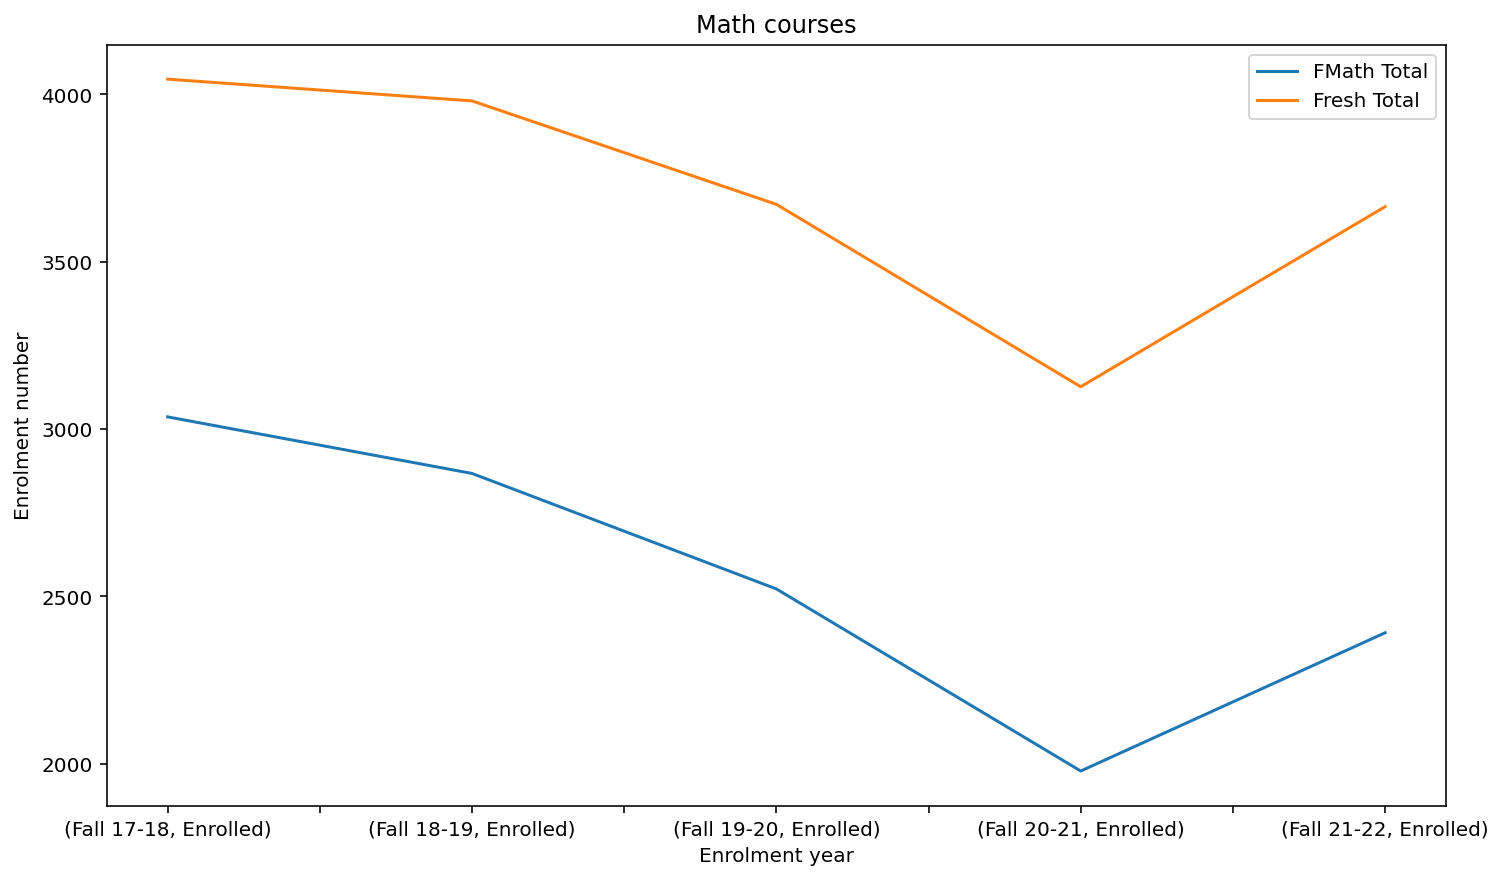

In [18]:
# Graphs

Fresh.loc['FMath Total'][0:5].plot(title='Math courses', legend=True, xlabel='Enrolment year', ylabel='Enrolment number')
Fresh.loc['Fresh Total'][0:5].plot(title='Math courses', legend=True, xlabel='Enrolment year', ylabel='Enrolment number')

/tmp/ipykernel_436/1805742688.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot1 = plt.subplot(131)
/tmp/ipykernel_436/1805742688.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plot2 = plt.subplot(132)


<Axes: title={'center': 'Proportion of Total Math to School'}, xlabel='Enrolment year', ylabel='Enrolment number'>

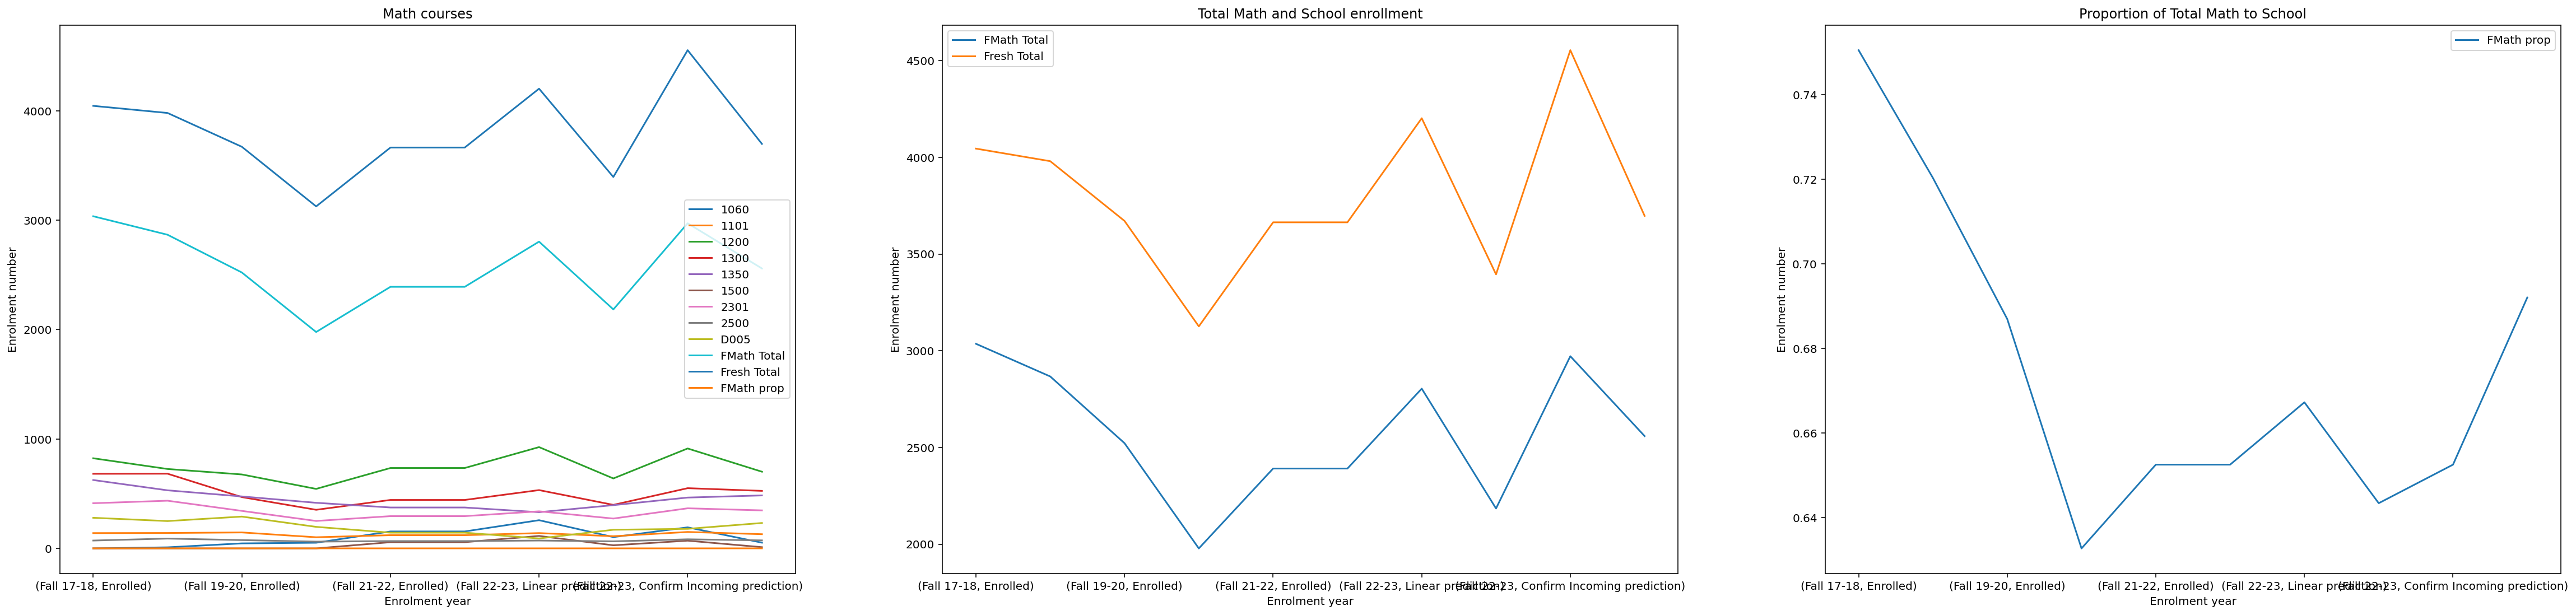

In [20]:
fig, ax = plt.subplots(2, 2,  figsize = (40, 9))


plot1 = plt.subplot(131)
plot2 = plt.subplot(132)
plot3 = plt.subplot(133)

for i in range(12):
    Fresh.iloc[i].plot(title='Math courses', legend=True, xlabel='Enrolment year', ylabel='Enrolment number', ax = plot1)
Fresh.iloc[9].plot(title='Math courses', legend=True, xlabel='Enrolment year', ylabel='Enrolment number', ax = plot2)
Fresh.iloc[10].plot(title='Total Math and School enrollment', legend=True, xlabel='Enrolment year', ylabel='Enrolment number', ax = plot2)
Fresh.iloc[11].plot(title='Proportion of Total Math to School', legend=True, xlabel='Enrolment year', ylabel='Enrolment number', ax = plot3)